1- Preparing the data

In [1]:
# importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading the data
data = pd.read_csv('data.csv')
# printing the number of row and columns in the dataset
print("\n\t the dataframe has {0[0]} row and {0[1]} columns. \n".format(data.shape))
# printing the first five row information of our dataset
data.head()


	 the dataframe has 569 row and 33 columns. 



id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

2- Visualizing the data

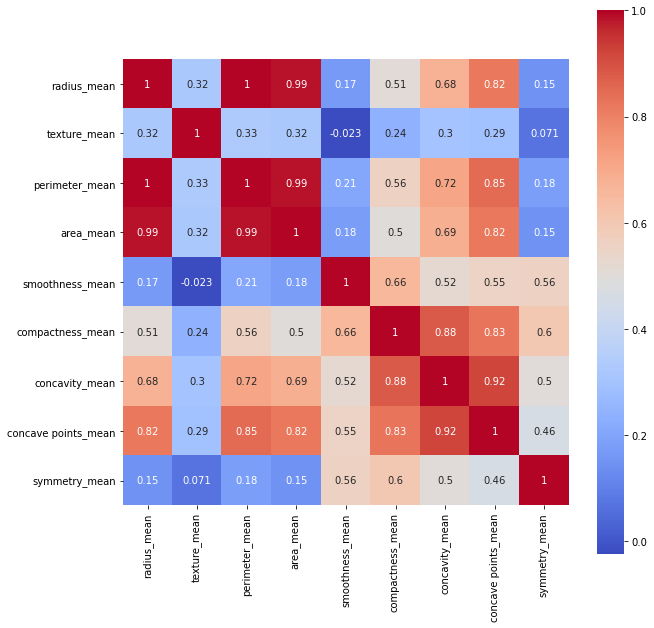

In [4]:
# using seaborn we will create heatmap of correlations between the features
faetures_mean = list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[faetures_mean].corr(), annot=True,square=True,cmap='coolwarm')
plt.show()

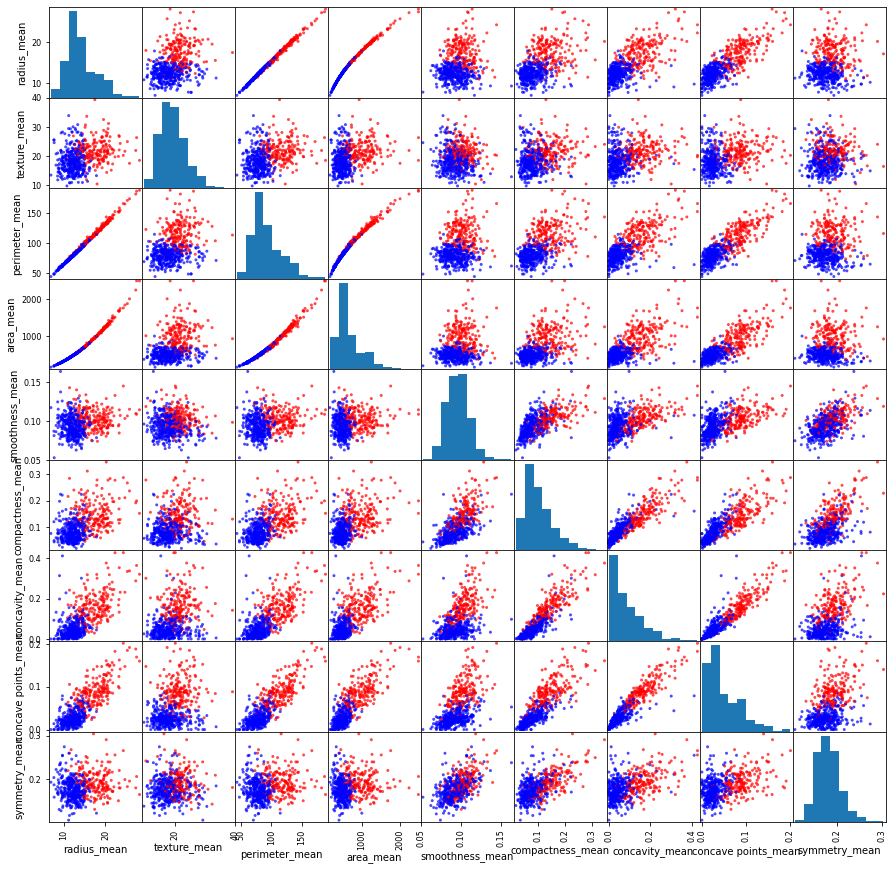

In [5]:
# creating the scattering matrix where red dots corresponding to malignant and blue to benign
color_dic = {'M':"red",'B':'blue'}
colors = data['diagnosis'].map(lambda x:color_dic.get(x))
sm = pd.plotting.scatter_matrix(data[faetures_mean],c=colors,alpha=.7,figsize=((15,15)))
plt.show()

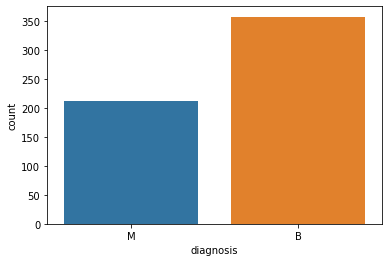

In [6]:
#counting the no of malignant and benign in the whole dataset
sns.countplot(x='diagnosis',data=data)

3- Machine Learning

In [7]:
# droping the unused columns
data.drop(['id','Unnamed: 32'],axis = 1,inplace=True)
# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [8]:
# defining the faetures and labels of the dataset
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [9]:
from sklearn.model_selection import train_test_split
# spliting the our dataset into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
loss = 30


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\RAJESH KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
prediction = lr.predict(x_test)

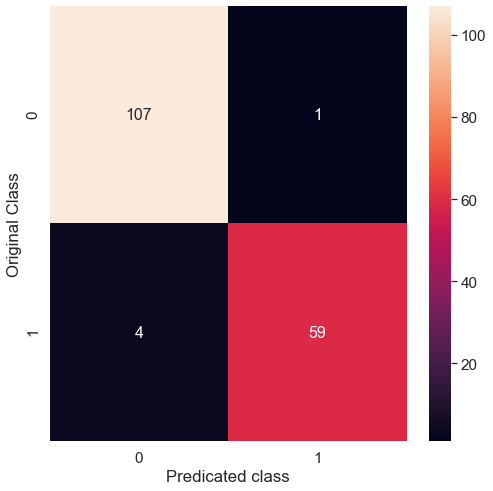

In [12]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
df_cm =pd.DataFrame(confusion_matrix(y_test,prediction), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt='g')
plt.xlabel('Predicated class')
plt.ylabel('Original Class')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,prediction)
# print(f'score of your model is {score%100-loss}%')

In [16]:
score

0.9707602339181286

##implementing the Decision tree classifier for breast data classification

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=1)

In [18]:
prediction = clf.predict(x_test)

In [19]:
decision_tree_score = accuracy_score(prediction,y_test)
decision_tree_score

0.8947368421052632

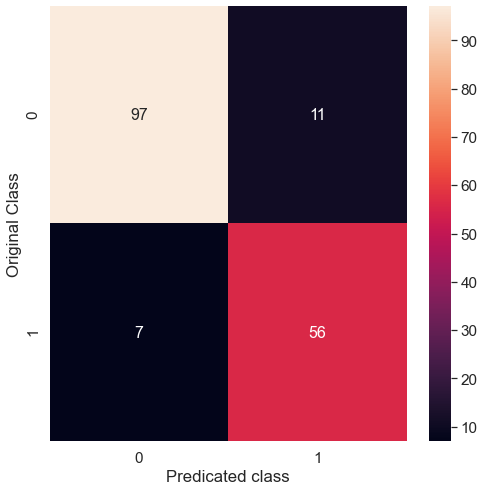

In [20]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
df_cm =pd.DataFrame(confusion_matrix(y_test,prediction), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt='g')
plt.xlabel('Predicated class')
plt.ylabel('Original Class')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=1,random_state=0)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=1, random_state=0)

In [22]:
prediction=rfc.predict(x_test)

In [23]:
rfc_score = accuracy_score(y_test,prediction)
rfc_score

RandomForestClassifier(max_depth=1, random_state=0)

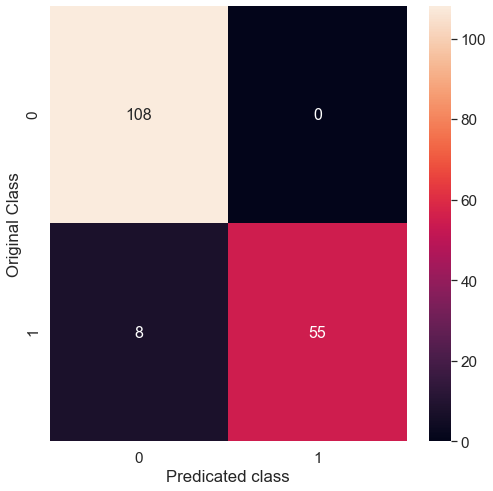

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
df_cm =pd.DataFrame(confusion_matrix(y_test,prediction), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt='g')
plt.xlabel('Predicated class')
plt.ylabel('Original Class')
plt.show()

In [26]:
rfc_score

0.9532163742690059